In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px 

In [2]:
import requests
import datetime
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

starttime = datetime.date(2017,1,1)
endtime = datetime.date(2024,5,16)

url = f'{coindeskURL}start={starttime:%Y-%m-%d}&end={endtime:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":964.325,"2017-01-02":1009.9738,"2017-01-03":1028.3338,"2017-01-04":1047.1,"2017-01-05":1140.385,"2017-01-06":985.9388,"2017-01-07":837.8363,"2017-01-08":923.5238,"2017-01-09":889.3388,"2017-01-10":905.2263,"2017-01-11":910.6063,"2017-01-12":772.6613,"2017-01-13":784.8938,"2017-01-14":820.6888,"2017-01-15":821.1963,"2017-01-16":830.74,"2017-01-17":848.5813,"2017-01-18":890.2938,"2017-01-19":888.0625,"2017-01-20":896.1638,"2017-01-21":920.5888,"2017-01-22":934.7775,"2017-01-23":920.365,"2017-01-24":912.2125,"2017-01-25":898.55,"2017-01-26":901.05,"2017-01-27":912.8438,"2017-01-28":919.795,"2017-01-29":920.8288,"2017-01-30":916.9113,"2017-01-31":921.3513,"2017-02-01":973.065,"2017-02-02":982.8275,"2017-02-03":1020.09,"2017-02-04":1011.215,"2017-02-05":1029.4012,"2017-02-06":1019.3125,"2017-02-07":1029.4088,"2017-02-08":1067.7088,"2017-02-09":1072.205,"2017-02-10":974.9588,"2017-02-11":997.2275,"2017-02-12":1004.7138,"2017-02-13":1004.8538,"2017-02-14":994.58,"2017-0

In [3]:
import json
data = result.content
decoded_data = data.decode('utf-8')
decoded_json = json.loads(decoded_data)

df = pd.DataFrame(decoded_json['bpi'].items(), columns=['Date', 'Price'])

df

,Date,Price
0,2017-01-01,964.3250
1,2017-01-02,1009.9738
2,2017-01-03,1028.3338
3,2017-01-04,1047.1000
4,2017-01-05,1140.3850
...,...,...
2683,2024-05-11,61042.6086
2684,2024-05-12,61357.9214
2685,2024-05-13,62767.5337
2686,2024-05-14,61751.6311


In [4]:
df.info()   #by default Date is object in json.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2688 non-null   object 
 1   Price   2688 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2688 non-null   datetime64[ns]
 1   Price   2688 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.1 KB


In [7]:
df = df.set_index('Date')
#df.index = pd.to_datetime(df.index) , after indexing also can be converted to datetime
df

,Price
Date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2024-05-11,61042.6086
2024-05-12,61357.9214
2024-05-13,62767.5337


<Axes: xlabel='Date'>

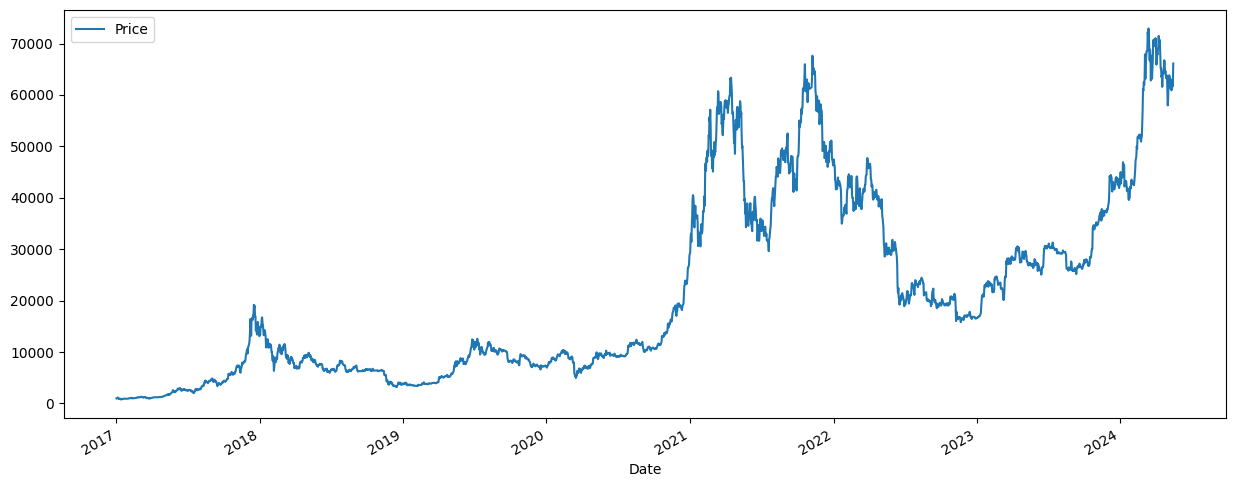

In [8]:
df.plot(figsize=(15,6))

D Calendar day

B Business day

W Weekly

M Month

Q Quarter

A Year end

H Hours

T Minutes

S Seconds 


Use E for End of period and S for begin.

<Axes: xlabel='Date'>

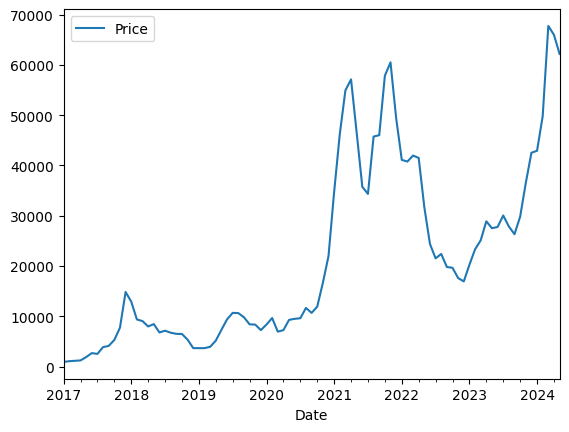

In [9]:
df.resample('ME').mean().plot()

<Axes: xlabel='Date'>

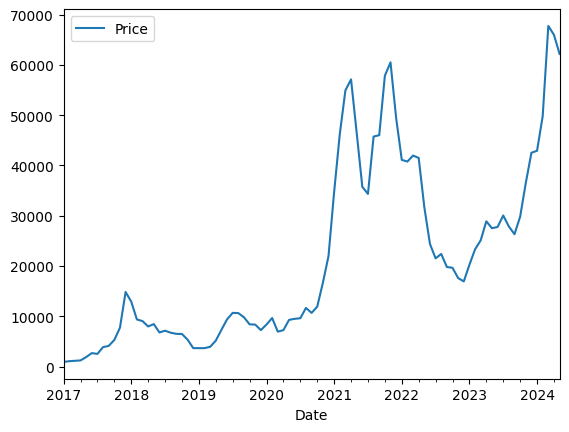

In [10]:
df.resample('MS').mean().plot()

<Axes: xlabel='Date'>

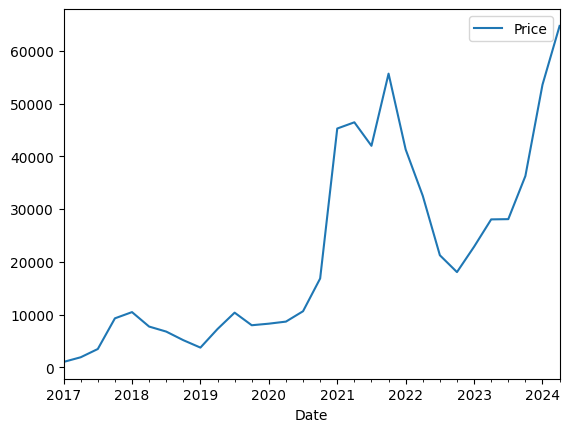

In [11]:
df.resample('QS').mean().plot()

<Axes: xlabel='Date'>

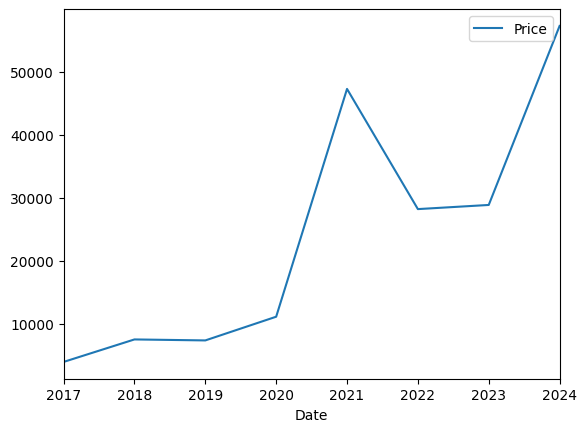

In [12]:
df.resample('YE').mean().plot()

DIFF

In [13]:
df[:10]

,Price
Date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
2017-01-06,985.9388
2017-01-07,837.8363
2017-01-08,923.5238
2017-01-09,889.3388


In [14]:
df[:10].diff()   #difference of 1 day price

,Price
Date,
2017-01-01,NaN
2017-01-02,45.6488
2017-01-03,18.3600
2017-01-04,18.7662
2017-01-05,93.2850
2017-01-06,-154.4462
2017-01-07,-148.1025
2017-01-08,85.6875
2017-01-09,-34.1850


In [15]:
df[:10].diff(7)  #weekly difference

,Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-07,NaN
2017-01-08,-40.8012
2017-01-09,-120.6350


<Axes: xlabel='Date'>

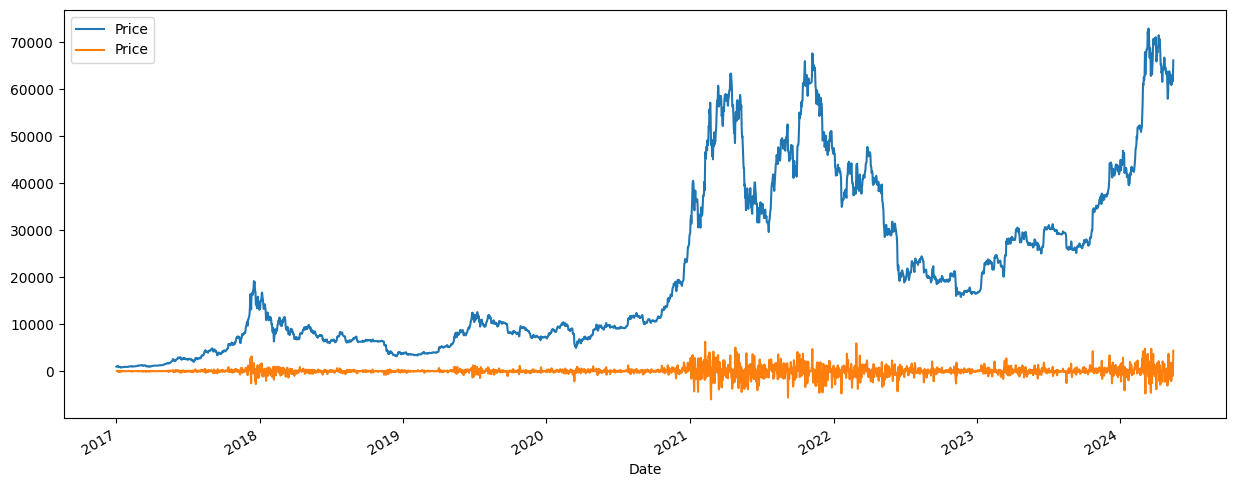

In [16]:
pd.concat([df['Price'], df['Price'].diff(1)], axis=1).plot(figsize=(15,6))

<Axes: xlabel='Date'>

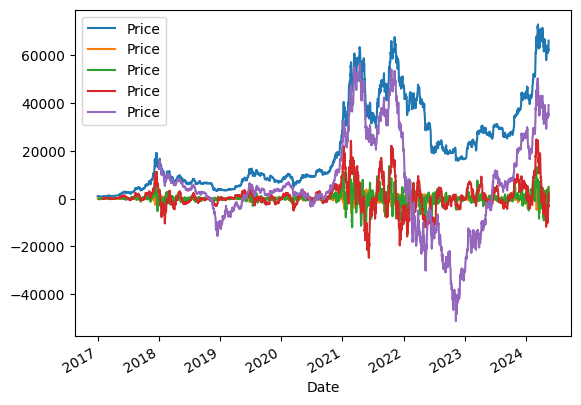

In [17]:
pd.concat([df['Price'], df['Price'].diff(1), df['Price'].diff(7), df['Price'].diff(30),df['Price'].diff(365)], axis=1).plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

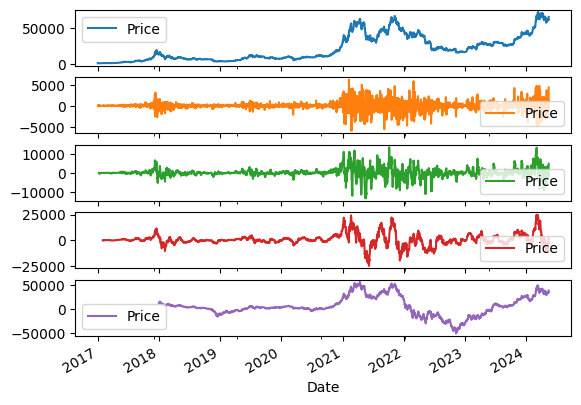

In [18]:
pd.concat([df['Price'], df['Price'].diff(1), df['Price'].diff(7), df['Price'].diff(30),df['Price'].diff(365)], axis=1).plot(subplots=True)

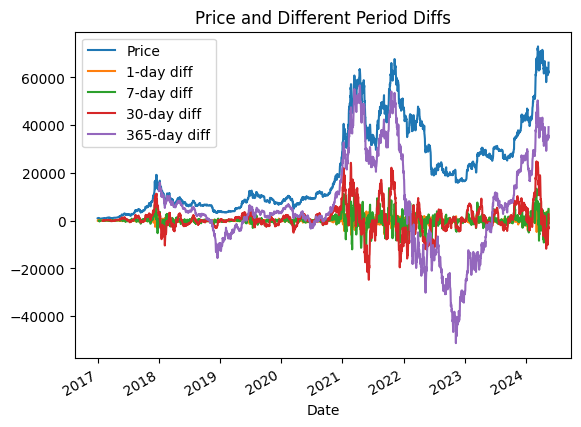

In [19]:
price_diff_1 = df['Price'].diff(1)
price_diff_7 = df['Price'].diff(7)
price_diff_30 = df['Price'].diff(30)
price_diff_365 = df['Price'].diff(365)

ax = pd.concat([df['Price'], price_diff_1, price_diff_7, price_diff_30, price_diff_365], axis=1).plot()
ax.legend(["Price", "1-day diff", "7-day diff", "30-day diff", "365-day diff"])

# Set title
ax.set_title('Price and Different Period Diffs')

# Show the plot
plt.show()

SHIFT

In [20]:
df[:5].shift()

,Price
Date,
2017-01-01,NaN
2017-01-02,964.3250
2017-01-03,1009.9738
2017-01-04,1028.3338
2017-01-05,1047.1000


In [21]:
df[:5].shift(2)

,Price
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,964.3250
2017-01-04,1009.9738
2017-01-05,1028.3338


In [22]:
df[:5].shift(1,axis=0)  #for index shifting

,Price
Date,
2017-01-01,NaN
2017-01-02,964.3250
2017-01-03,1009.9738
2017-01-04,1028.3338
2017-01-05,1047.1000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

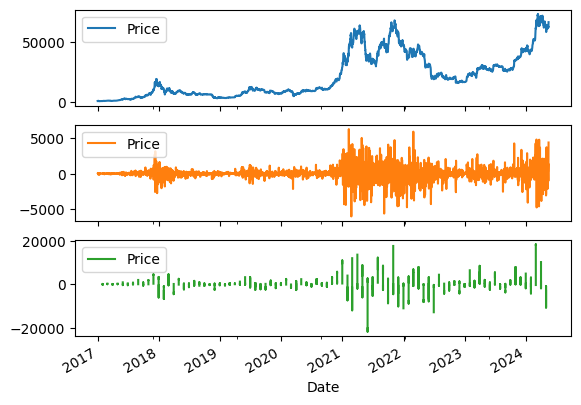

In [23]:
pd.concat([df['Price'] , df['Price'] - df['Price'].shift(1) , df['Price'] - df['Price'].shift(1, freq='ME')], axis=1).plot(subplots=True)

<Axes: xlabel='Date'>

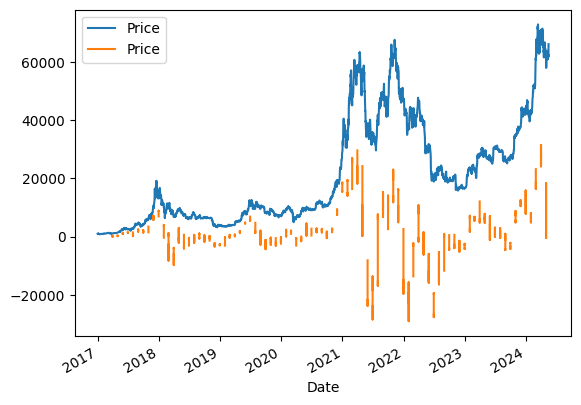

In [24]:
pd.concat([df['Price'] , df['Price'] - df['Price'].shift(1,freq='3ME')] ,axis=1).plot()

<Axes: xlabel='Date'>

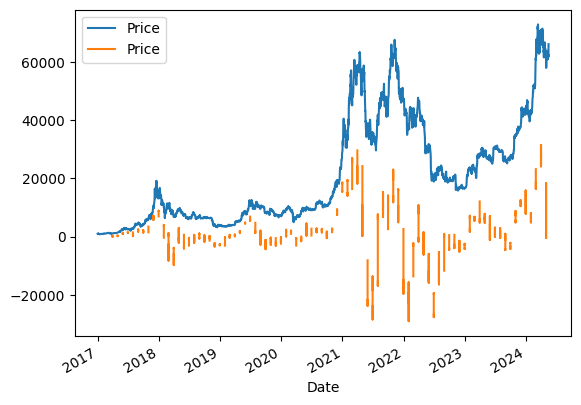

In [25]:
pd.concat([df['Price'] , df['Price'] - df['Price'].shift(1,freq='3ME')] ,axis=1).plot()

<Axes: xlabel='Date'>

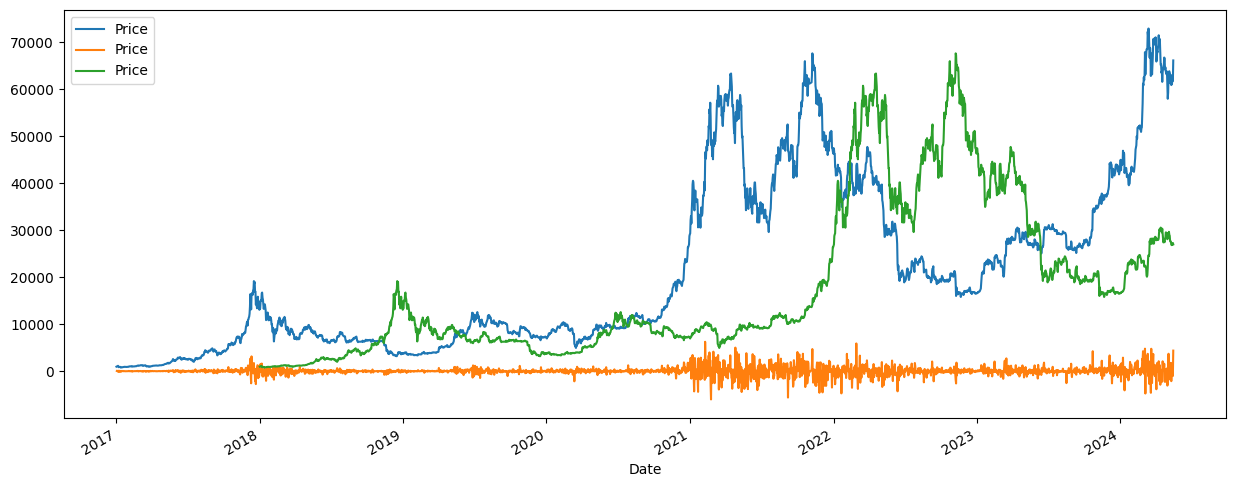

In [26]:
pd.concat([df['Price'] , df['Price'] - df['Price'].shift(1), df['Price'].shift(365,axis=0)] ,axis=1).plot(figsize=(15,6))

Rolling

In [27]:
df.rolling(window=10, min_periods=1).mean()

,Price
Date,
2017-01-01,964.325000
2017-01-02,987.149400
2017-01-03,1000.877533
2017-01-04,1012.433150
2017-01-05,1038.023520
...,...
2024-05-11,62268.267930
2024-05-12,62473.752450
2024-05-13,62449.171790


In [28]:
df

,Price
Date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2024-05-11,61042.6086
2024-05-12,61357.9214
2024-05-13,62767.5337


<Axes: xlabel='Date'>

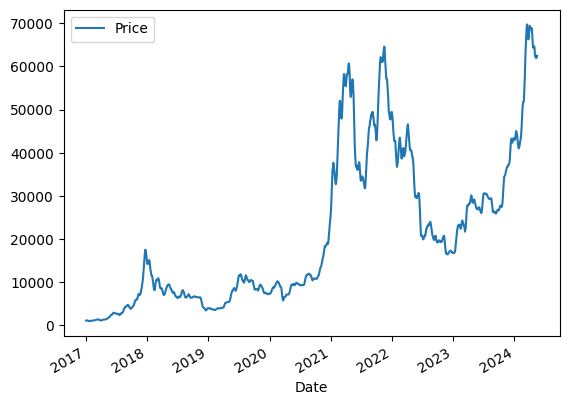

In [29]:
df.rolling(window=10, min_periods=1).mean().plot()

In [30]:
df['Price'].resample('W').mean().rolling(window=10,min_periods=1).mean()

Date
2017-01-01      964.325000
2017-01-08      980.240464
2017-01-15      934.665624
2017-01-22      922.756636
2017-01-29      920.652311
                  ...     
2024-04-21    63671.389167
2024-04-28    65007.156427
2024-05-05    66015.692407
2024-05-12    66203.739171
2024-05-19    65843.106443
Freq: W-SUN, Name: Price, Length: 386, dtype: float64

<Axes: xlabel='Date'>

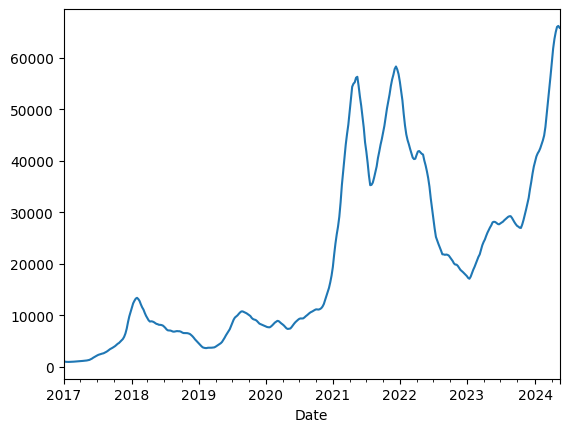

In [31]:
df['Price'].resample('W').mean().rolling(window=10,min_periods=1).mean().plot()

<Axes: xlabel='Date'>

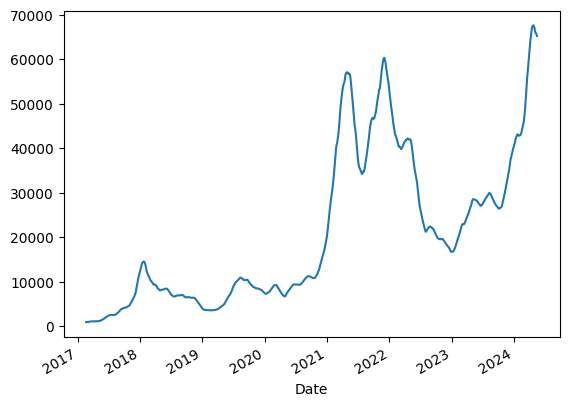

In [32]:
df['Price'].rolling(window=50).mean().plot()


<Axes: xlabel='Date'>

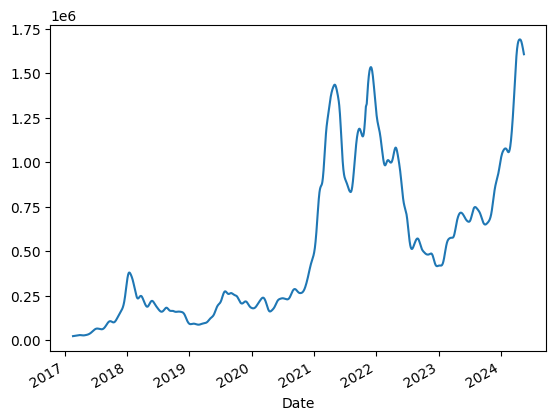

In [33]:
df['Price'].rolling(window=50,win_type='gaussian').sum(std=10).plot()

In [34]:
df['EWA50'] = df['Price'].ewm(span=50).mean()

<Axes: xlabel='Date'>

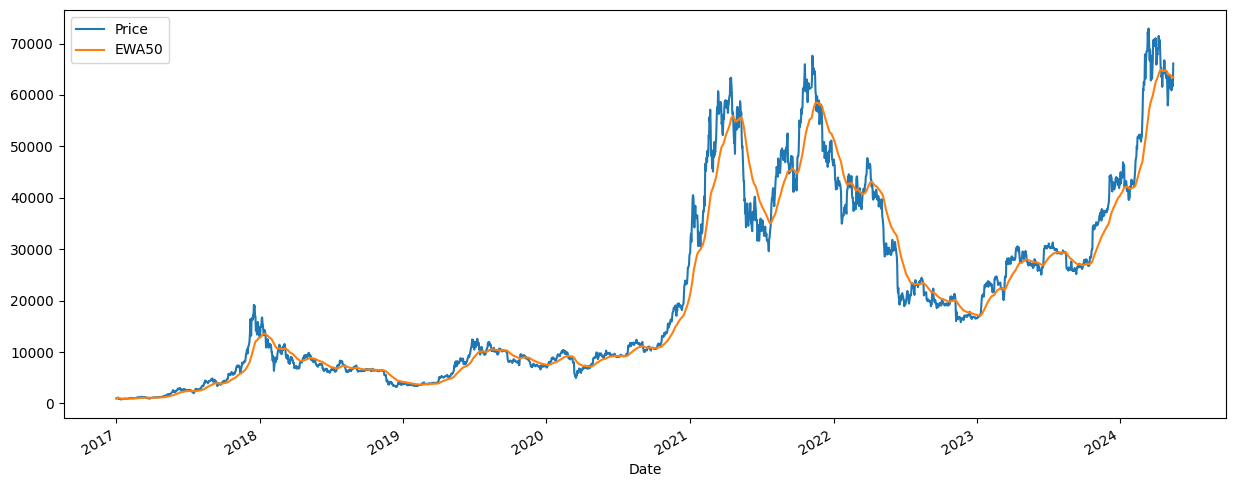

In [35]:
df.plot(figsize=(15,6))

<Axes: xlabel='Date'>

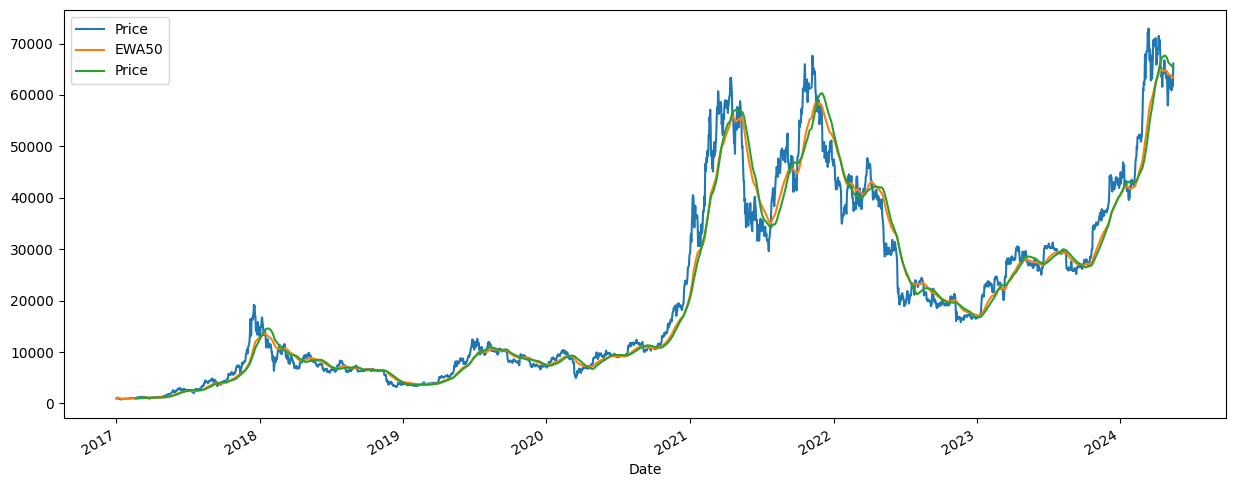

In [36]:
pd.concat([df,df['Price'].rolling(window=50).mean()], axis=1).plot(figsize=(15,6))

GroupBy

In [37]:
df['Price'].groupby(df.index.dayofweek).mean()  #just for intuition , not applicable on this datasete

Date
0    21173.169452
1    21025.984037
2    21132.516289
3    20960.737184
4    20954.157170
5    21115.683007
6    21080.670757
Name: Price, dtype: float64

In [38]:
df['Price'].groupby(df.index.month).mean()

Date
1     20603.689754
2     23034.290973
3     26348.470444
4     26879.109642
5     21734.669515
6     16596.133439
7     16543.671731
8     18405.120181
9     17598.796725
10    19903.375236
11    21055.496230
12    22367.817782
Name: Price, dtype: float64

In [39]:
df['Price'].groupby(df.index.year).mean()

Date
2017     3951.843629
2018     7519.442859
2019     7362.522655
2020    11124.399766
2021    47263.526556
2022    28196.608564
2023    28853.998874
2024    57256.940917
Name: Price, dtype: float64

Cumsum

In [40]:
df[:5]

,Price,EWA50
Date,,
2017-01-01,964.3250,964.325000
2017-01-02,1009.9738,987.605888
2017-01-03,1028.3338,1001.728445
2017-01-04,1047.1000,1013.760796
2017-01-05,1140.3850,1041.151305


In [41]:
df['Price'][:5]

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [42]:
df['Price'][:5].cumsum()

Date
2017-01-01     964.3250
2017-01-02    1974.2988
2017-01-03    3002.6326
2017-01-04    4049.7326
2017-01-05    5190.1176
Name: Price, dtype: float64

In [45]:
df['Price'][:5]

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [46]:
df['Price'][:5].cummin()  #check if more than previous, then replace by lesser

Date
2017-01-01    964.325
2017-01-02    964.325
2017-01-03    964.325
2017-01-04    964.325
2017-01-05    964.325
Name: Price, dtype: float64

In [47]:
df['Price'][:5].cummax()  #check if less than previous, then replace by higher

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [48]:
df['Price'][:5].cumprod()  #keep multiplying the sequences

Date
2017-01-01    9.643250e+02
2017-01-02    9.739430e+05
2017-01-03    1.001538e+09
2017-01-04    1.048711e+12
2017-01-05    1.195934e+15
Name: Price, dtype: float64

In [49]:
df['Price'][:5]

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [50]:
df['Price'][:5].pct_change(1)

Date
2017-01-01         NaN
2017-01-02    0.047338
2017-01-03    0.018179
2017-01-04    0.018249
2017-01-05    0.089089
Name: Price, dtype: float64

In [51]:
df['Price'][:5].pct_change(2)

Date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03    0.066377
2017-01-04    0.036760
2017-01-05    0.108964
Name: Price, dtype: float64

In [52]:
df['Price'][:5]

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [53]:
df['Price'][:5].expanding().sum() #similiar to cumsum

Date
2017-01-01     964.3250
2017-01-02    1974.2988
2017-01-03    3002.6326
2017-01-04    4049.7326
2017-01-05    5190.1176
Name: Price, dtype: float64

In [54]:
df['Price'][:5].expanding().mean()

Date
2017-01-01     964.325000
2017-01-02     987.149400
2017-01-03    1000.877533
2017-01-04    1012.433150
2017-01-05    1038.023520
Name: Price, dtype: float64

In [55]:
df['Price'][:5].expanding().max()  #cummax()

Date
2017-01-01     964.3250
2017-01-02    1009.9738
2017-01-03    1028.3338
2017-01-04    1047.1000
2017-01-05    1140.3850
Name: Price, dtype: float64

In [56]:
df['Price'][:5].expanding().min()  #cummin

Date
2017-01-01    964.325
2017-01-02    964.325
2017-01-03    964.325
2017-01-04    964.325
2017-01-05    964.325
Name: Price, dtype: float64